<a href="https://colab.research.google.com/github/dsmohiit/EDA/blob/main/Insurance_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("/content/insurance_data.csv")

In [102]:
df.shape

(1340, 11)

In [103]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [105]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [106]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [107]:
df[df["age"].isnull()]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
6,6,7,NaN,male,37.3,86,Yes,0,No,northwest,1141.45


# **Categorizing BMI**

In [108]:
def bmi(num):
  if num < 18.5:
    return "Underweight"
  elif num > 18.5 and num < 25:
    return "Normal"
  elif num > 25 and num < 30:
    return "Overweight"
  else:
    return "Obese"

In [109]:
df["bmi categories"] = df["bmi"].apply(bmi)

In [110]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi categories
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Normal
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,Obese
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,Obese
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40,Obese
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,Obese
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,Obese
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,Obese
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,Obese


# **Categorizing Bloodpressure**

In [111]:
def bloodpressure(num):
  if num <= 120:
    return "Normal"
  elif num > 122 and num < 130:
    return "Elevated"
  elif num > 130:
    return "High"

In [112]:
df["bp categories"] = df["bloodpressure"].apply(bloodpressure)

In [113]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi categories,bp categories
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Normal,Normal
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,Obese,Normal
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,Obese,Normal
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40,Obese,Normal
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01,Obese,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,Obese,Normal
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,Obese,Normal
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,Obese,Normal
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,Obese,Normal


In [114]:
df.drop(columns= ["index", "PatientID"], inplace= True)

In [115]:
df.sample(3)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi categories,bp categories
469,53.0,female,29.8,99,No,1,No,southeast,6500.24,Overweight,Normal
123,55.0,female,40.2,82,No,0,No,southeast,2217.47,Obese,Normal
324,60.0,female,26.7,94,No,0,No,northwest,4571.41,Overweight,Normal


# **Univariate Analysis**

## Age

In [116]:
df["age"].describe().reset_index()

,index,age
0,count,1335.000000
1,mean,38.078652
2,std,11.102924
3,min,18.000000
4,25%,29.000000
5,50%,38.000000
6,75%,47.000000
7,max,60.000000


<Axes: >

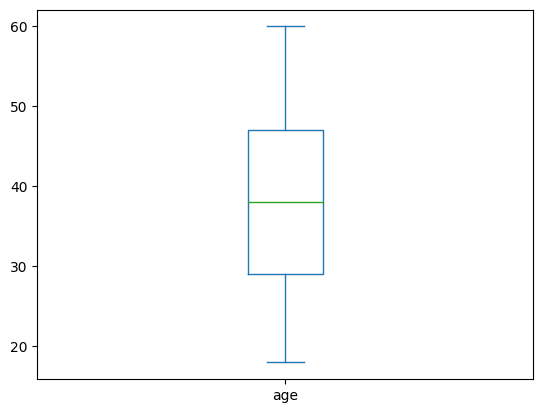

In [117]:
df["age"].plot(kind= "box")

## Gender

In [118]:
df["gender"].value_counts()

gender
male      678
female    662
Name: count, dtype: int64

<Axes: xlabel='gender'>

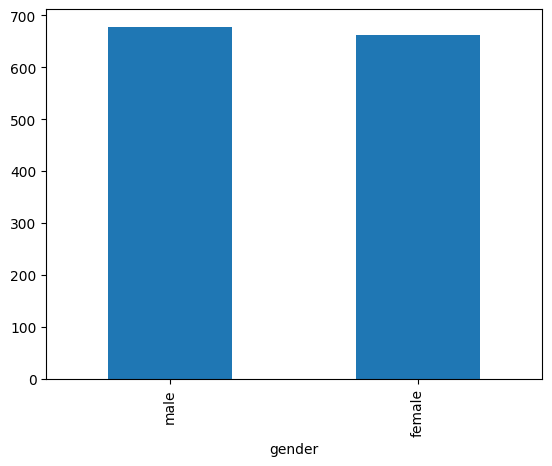

In [119]:
df["gender"].value_counts().plot(kind= "bar")

<Axes: ylabel='count'>

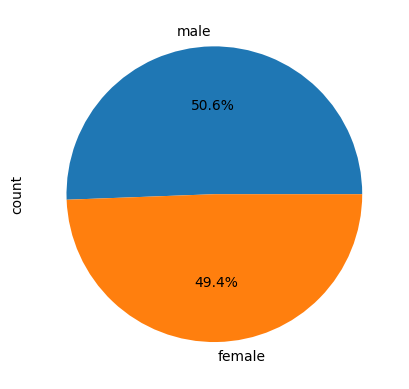

In [120]:
df["gender"].value_counts().plot(kind= "pie", autopct= "%0.1f%%")

## BMI

In [121]:
df["bmi"].describe().reset_index()

,index,bmi
0,count,1340.000000
1,mean,30.668955
2,std,6.106735
3,min,16.000000
4,25%,26.275000
5,50%,30.400000
6,75%,34.700000
7,max,53.100000


## BMI Categories

In [122]:
df["bmi categories"].value_counts()

bmi categories
Obese          714
Overweight     384
Normal         222
Underweight     20
Name: count, dtype: int64

<Axes: xlabel='bmi categories'>

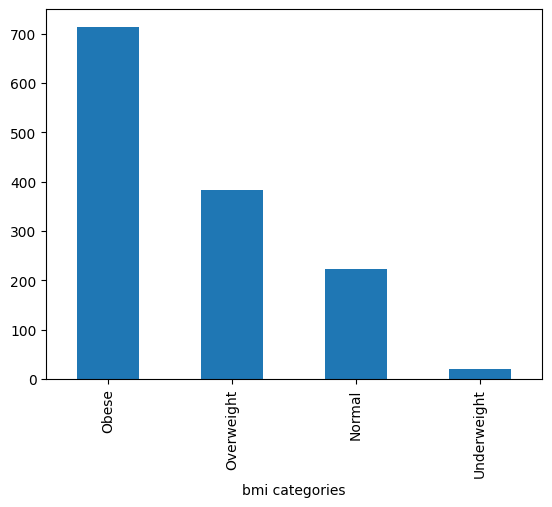

In [123]:
df["bmi categories"].value_counts().plot(kind= "bar")

<Axes: ylabel='count'>

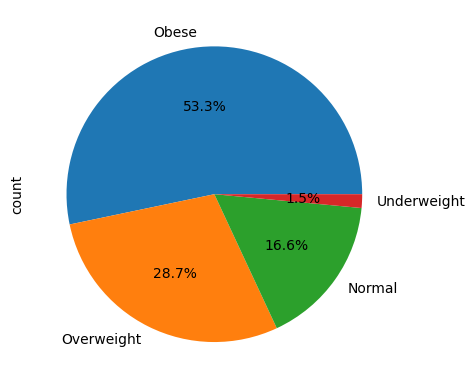

In [124]:
df["bmi categories"].value_counts().plot(kind= "pie", autopct= "%0.1f%%")

In [125]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi categories,bp categories
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Normal,Normal
1,24.0,male,30.1,87,No,0,No,southeast,1131.51,Obese,Normal
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,Obese,Normal
3,NaN,male,33.7,80,No,0,No,northwest,1136.40,Obese,Normal
4,NaN,male,34.1,100,No,0,No,northwest,1137.01,Obese,Normal
...,...,...,...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,Obese,Normal
1336,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,Obese,Normal
1337,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,Obese,Normal
1338,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,Obese,Normal


## Bloodpressure

In [126]:
df["bloodpressure"].value_counts()

bloodpressure
91     62
80     59
88     58
89     58
81     58
       ..
138     1
116     1
134     1
121     1
133     1
Name: count, Length: 61, dtype: int64

## Bloodpressure Categories

In [127]:
df["bp categories"].value_counts()

bp categories
Normal      1285
High          27
Elevated      24
Name: count, dtype: int64

<Axes: xlabel='bp categories'>

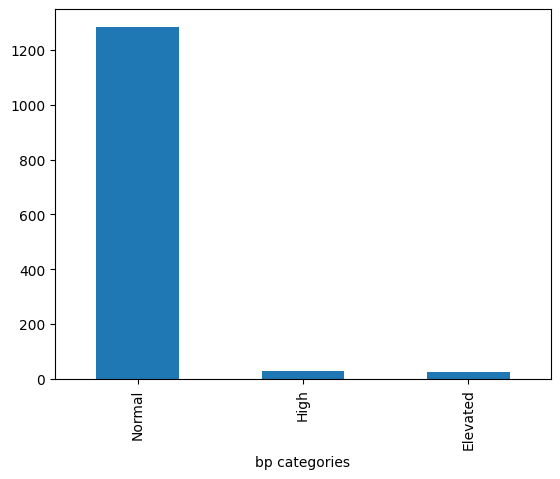

In [128]:
df["bp categories"].value_counts().plot(kind= "bar")

<Axes: ylabel='count'>

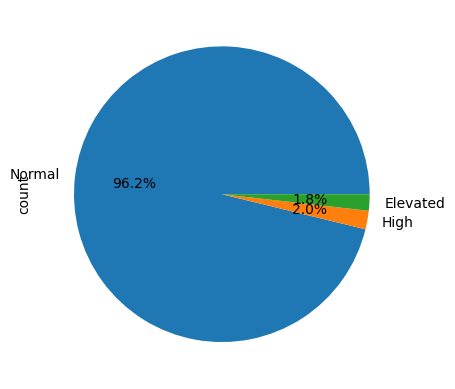

In [129]:
df["bp categories"].value_counts().plot(kind= "pie", autopct= "%0.1f%%")

## Diabetic

In [130]:
df["diabetic"].value_counts()

diabetic
No     698
Yes    642
Name: count, dtype: int64

<Axes: xlabel='diabetic'>

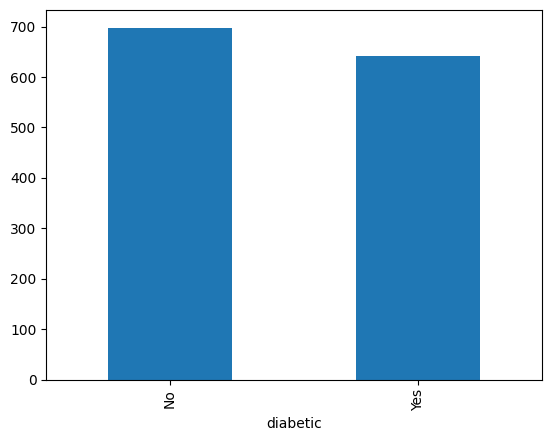

In [131]:
df["diabetic"].value_counts().plot(kind= "bar")

<Axes: ylabel='count'>

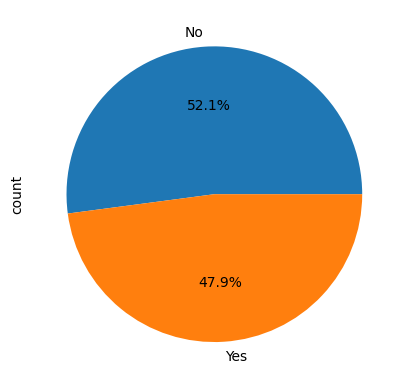

In [132]:
df["diabetic"].value_counts().plot(kind= "pie", autopct= "%0.1f%%")

## Children

In [133]:
df["children"].value_counts()

children
0    576
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: xlabel='children'>

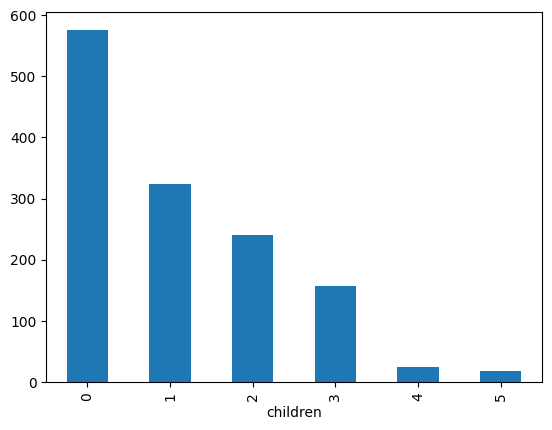

In [134]:
df["children"].value_counts().plot(kind= "bar")

<Axes: ylabel='count'>

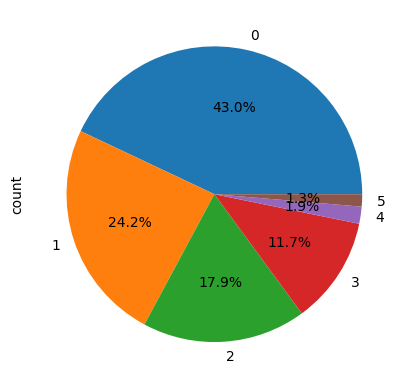

In [135]:
df["children"].value_counts().plot(kind= "pie", autopct= "%0.1f%%")

## Smoker

In [136]:
df["smoker"].value_counts()

smoker
No     1066
Yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker'>

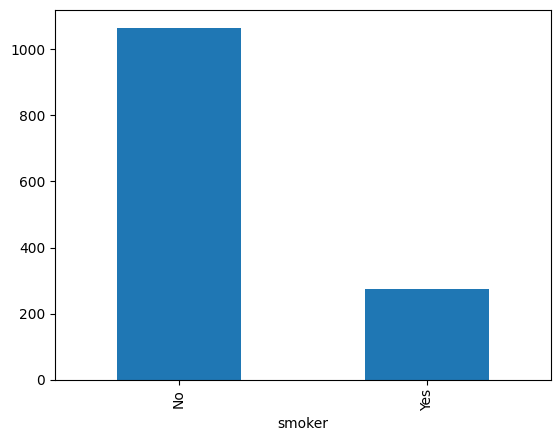

In [137]:
df["smoker"].value_counts().plot(kind= "bar")

<Axes: ylabel='count'>

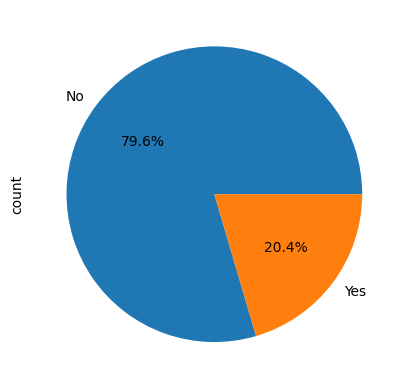

In [138]:
df["smoker"].value_counts().plot(kind= "pie", autopct= "%0.1f%%")

## Region

In [139]:
df["region"].value_counts()

region
southeast    443
northwest    349
southwest    314
northeast    231
Name: count, dtype: int64

<Axes: xlabel='region'>

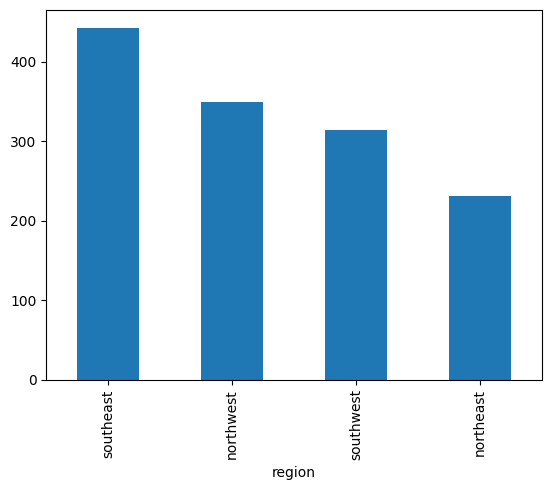

In [140]:
df["region"].value_counts().plot(kind= "bar")

<Axes: ylabel='count'>

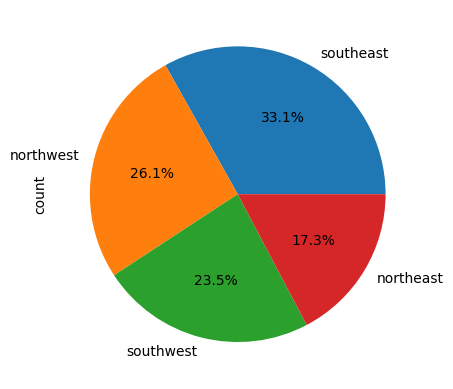

In [141]:
df["region"].value_counts().plot(kind= "pie", autopct= "%0.1f%%")

# **Bivariate Analysis**

In [142]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi categories,bp categories
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Normal,Normal
1,24.0,male,30.1,87,No,0,No,southeast,1131.51,Obese,Normal
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,Obese,Normal
3,NaN,male,33.7,80,No,0,No,northwest,1136.40,Obese,Normal
4,NaN,male,34.1,100,No,0,No,northwest,1137.01,Obese,Normal


### Which gender makes the most claim?


In [143]:
df.groupby("gender")["claim"].sum()

gender
female    8321061.23
male      9437617.93
Name: claim, dtype: float64

<Axes: xlabel='gender'>

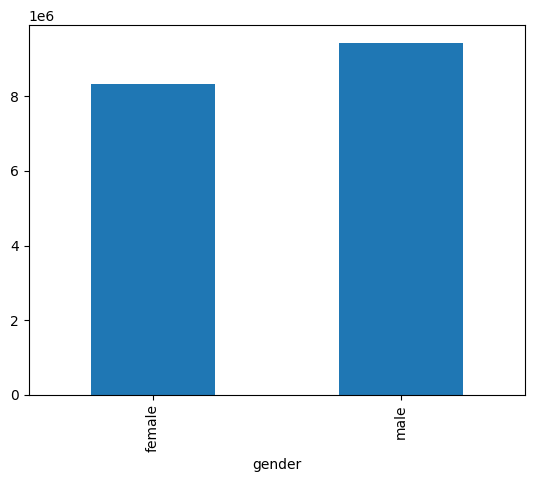

In [144]:
df.groupby("gender")["claim"].sum().plot(kind= "bar")

<Axes: ylabel='claim'>

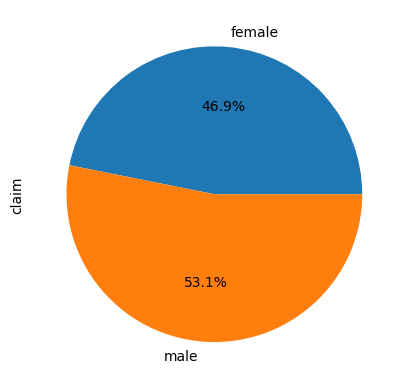

In [145]:
df.groupby("gender")["claim"].sum().plot(kind= "pie", autopct= "%0.1f%%")

### Which BMI Categorie claims most?


In [146]:
df.groupby("bmi categories")["claim"].mean().reset_index().sort_values("claim", ascending= False)

,bmi categories,claim
1,Obese,15490.677115
2,Overweight,10989.854609
0,Normal,10365.709459
3,Underweight,8852.201500


<Axes: title={'center': 'Avgerage Calim by BMI'}, xlabel='bmi categories'>

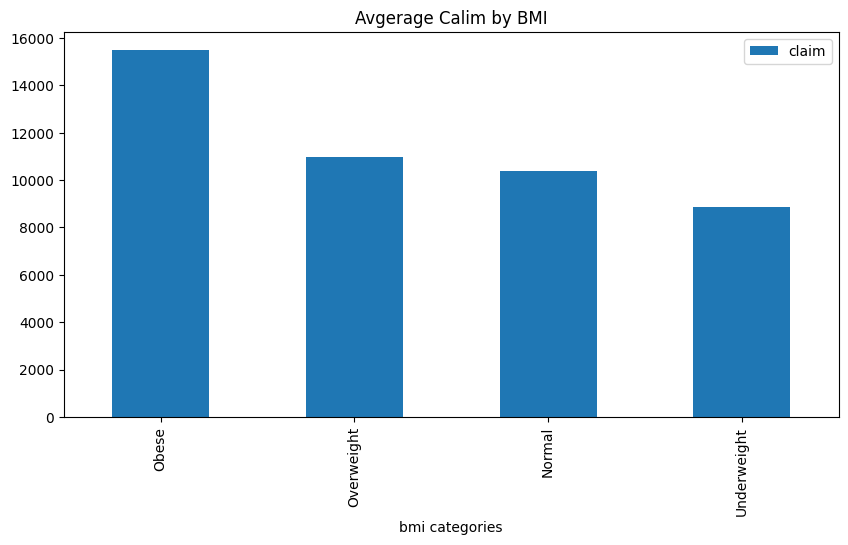

In [147]:
df.groupby("bmi categories")["claim"].mean().reset_index().sort_values("claim", ascending= False).plot.bar(title= "Avgerage Calim by BMI", x= "bmi categories", figsize= (10, 5))

### Age distribution w.r.t BMI.

In [148]:
df.groupby(["bmi categories"])["age"].agg(func= ["mean", "median"])

,mean,median
bmi categories,,
Normal,38.040541,37.0
Obese,37.520451,37.0
Overweight,39.109375,39.0
Underweight,38.500000,35.0


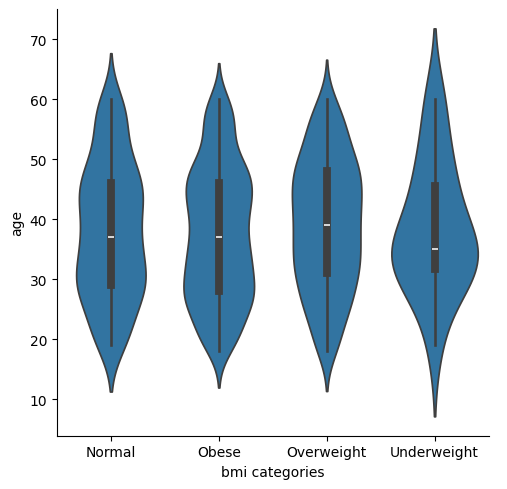

In [151]:
# "Normal" and "Obese" are seems to be bimodal.
# "Overweight" is much more spread as compared to other categories.
# "Underweight" is slightly right skewed.

sns.catplot(df, x= df["bmi categories"], y= df["age"], kind= "violin")
plt.show()

### Claim vs Bloodpressure Categories.

In [160]:
# GENERATED USING CHAT-GPT

def color_negative_red(val):
    if isinstance(val, pd.Series):
        return [f'color: {"red" if v < 30000 else "green" if v > 60000 else "black"}' for v in val]
    else:
        color = 'red' if val < 30000 else "blue" if val > 60000 else 'black'
        return f'color: {color}'


In [170]:
# "High Blood Pressure" people claims more then the other two blood pressure categories.
# But interesting insight is that the maximum amount was claimed by someone with Normal Blood pressure".

df.groupby("bp categories")["claim"].agg(func= ["mean", "median", "max", "min"]).sort_values(by= "mean", ascending= False).style.apply(color_negative_red)

,mean,median,max,min
bp categories,,,,
High,37306.211111,38245.590000,48517.560000,26140.360000
Elevated,37188.585417,37122.265000,52590.830000,26018.950000
Normal,12223.966599,8930.930000,63770.430000,1121.870000


## Relations between "bp categories" and "bmi categories" with "age" and "claim"

In [165]:
# GENERATED USING CHAT-GPT

def change_age_color(val):
    color = 'red' if val < 30 else 'black'
    return 'color: %s' % color

def change_claim_color(val):
    color = "red" if val < 30_000 else "black"
    return "color: %s" % color

In [171]:
df.pivot_table(values=["age", "claim"], index="bp categories", columns="bmi categories").style.applymap(change_age_color, subset="age").applymap(change_claim_color, subset="claim")

### BMI and BP vs Claim and Gender

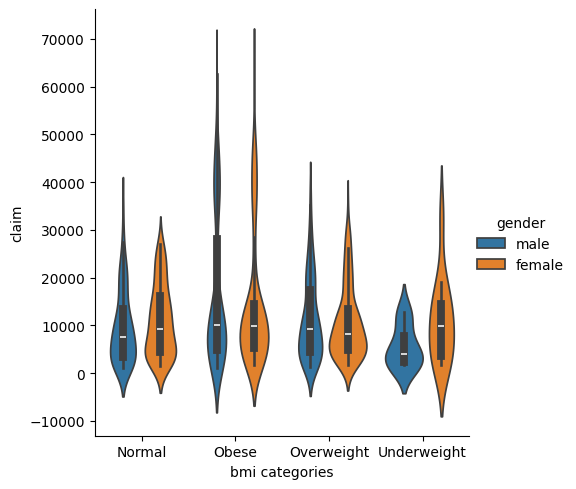

In [174]:
# In "Normal" and "Overweight" claims by males are more spread then females.
# In "Underweight" claims by females are much more spreaded then females.

sns.catplot(df, x= df["bmi categories"], y= df["claim"], kind= "violin", hue= df["gender"])

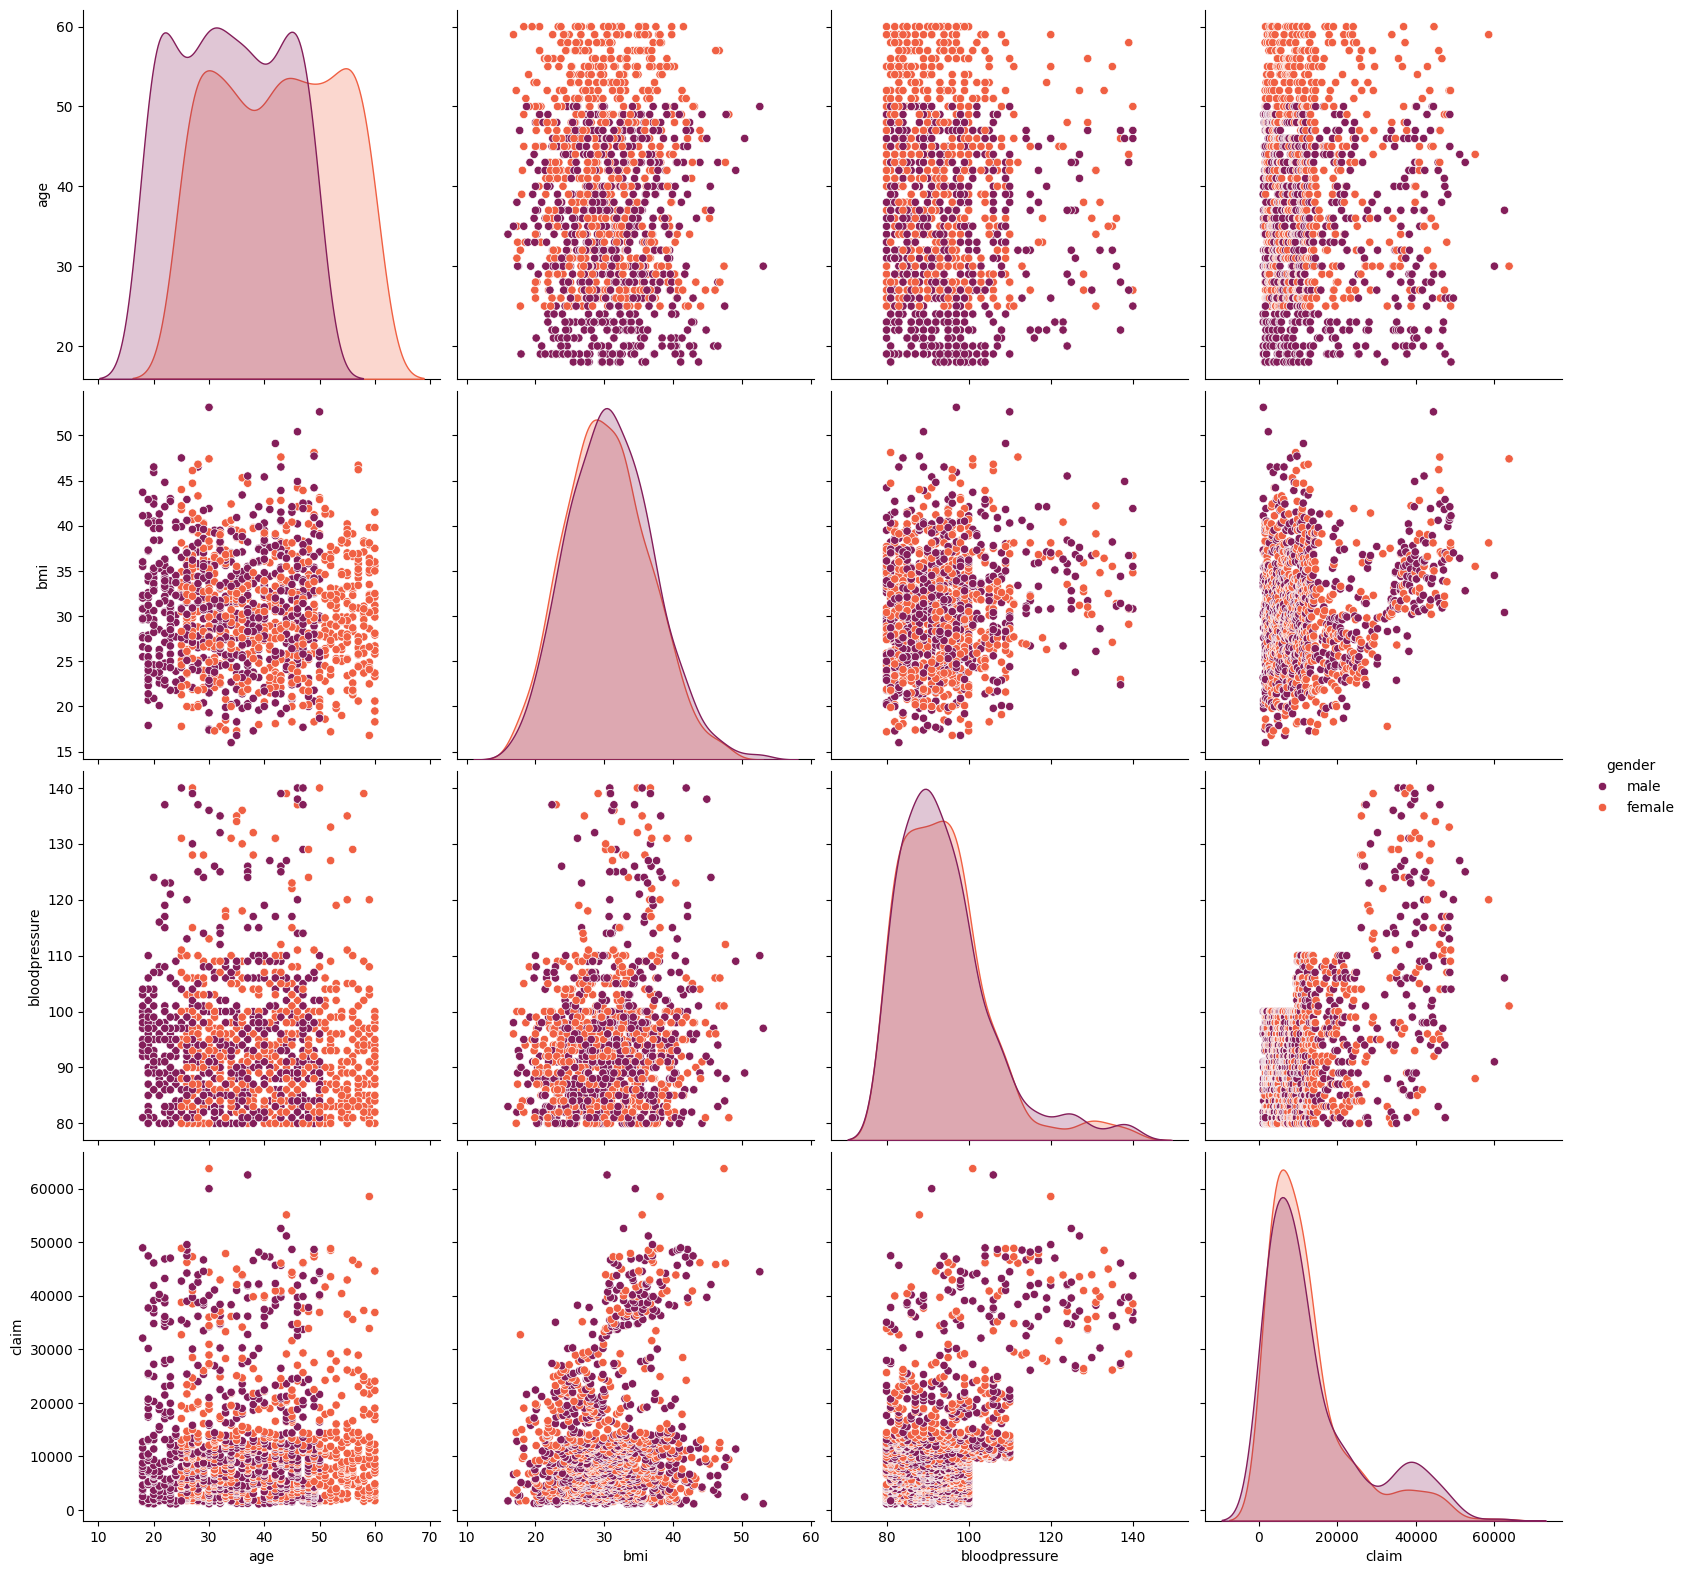

In [175]:
sns.pairplot(
    data=df,
    hue="gender",
    vars=["age", "bmi", "bloodpressure", "claim"],
    height=4,
    aspect=1,
    palette = "rocket"
)
plt.show()

### Smoker vs Claims

In [185]:
# In general smoker claim more amount of money then the non smokers.

df.groupby("smoker")["claim"].agg(func= ["mean", "median", "max", "min"])

,mean,median,max,min
smoker,,,,
No,8421.121576,7341.415,36910.61,1121.87
Yes,32050.231971,34456.350,63770.43,12829.46


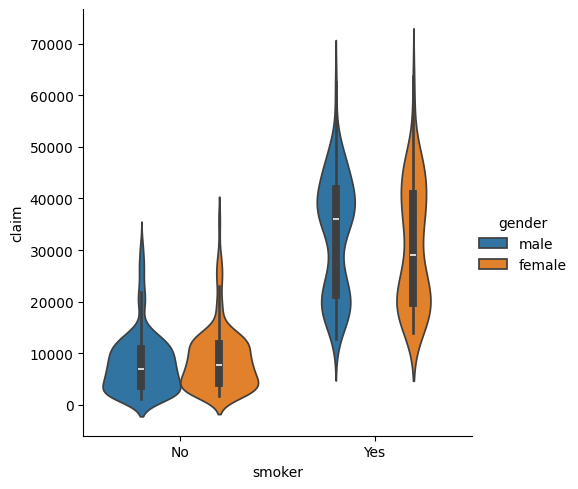

In [187]:
# Non smoker females and smoker females claim more insurance then the males in both the categories.
# The data of non smakers (both male and females) are somewhat right skewed.
# The distribution of smoker (both male and females) are bimodal and spread is more

sns.catplot(df, x= "smoker", y= "claim", hue= "gender", kind= "violin")

### Smoker vs Bloodpressure

In [188]:
# In general smokers have high chances of having high/elevated bloodpressure.

df.groupby(["smoker"])["bloodpressure"].agg(func= ["mean", "median", "max", "min"])

,mean,median,max,min
smoker,,,,
No,91.733583,91.0,140,80
Yes,103.587591,101.0,140,80


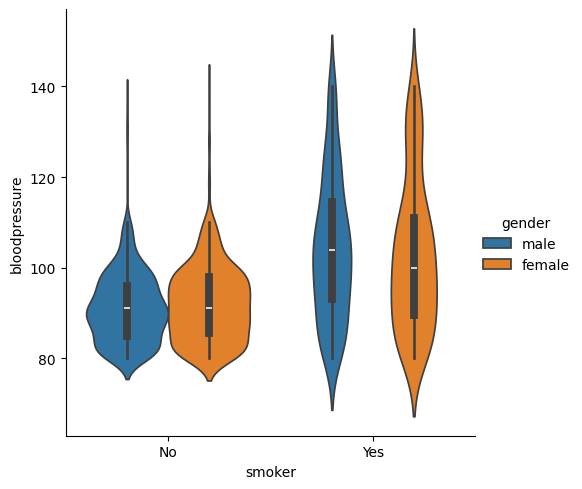

In [190]:
sns.catplot(df, x= "smoker", y= "bloodpressure", kind= "violin", hue= "gender")